
### **Basic k-means clustering**

In [ ]:
from sklearn.datasets import load_iris
from math import sqrt
import random
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
data = data.data[:,:2]

### **For k = 5:**

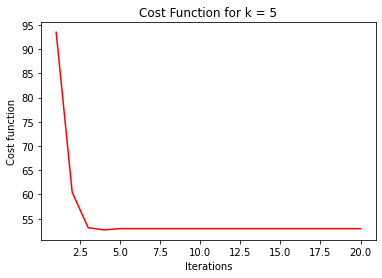

In [ ]:
k1 = 5
itr = 20
f1 = K_mean(k1, data, itr)

### **For k = 10:**

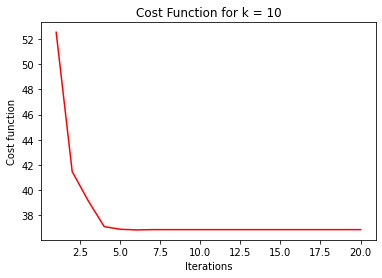

In [ ]:
k2 = 10
f2 = K_mean(k2, data, itr)

### **For k = 20:**

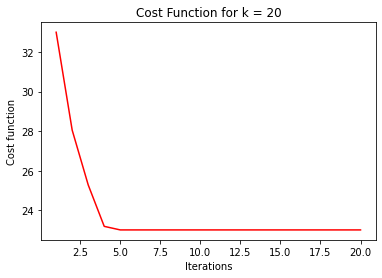

In [ ]:
k3 = 20
f3 = K_mean(k3, data, itr)

## **Functions:**

In [ ]:
# A function for calculating Euclidean Distance:
def Euclidean_Distance(in1, in2):
  distance = sqrt(sum((in1 - in2)**2))
  return distance

# ------------------------------------------------------------------------------
# A function for choosing k random centroids:
def K_Centroids(k, data):
  centroids = []
  for i in range(k):
    indx = random.randint(0 , data.shape[0]-1)
    C = data[indx]
    centroids.append(C)
  return centroids

# ------------------------------------------------------------------------------
# A function for clustering the data:
def Clustering(k, data, centroids):
  labels = []
  for point in data:
    distance = []

    # calculate distance of every point with each of the clusters
    for centroid in centroids:
      dist = Euclidean_Distance(point, centroid)
      distance.append(dist)

    labels.append(np.argmin(distance))
  return labels

# ------------------------------------------------------------------------------
# Cost function:
def Cost_Function(k, data, centroids, labels):
  dist_sum = 0
  for i in range(k):
    cluster_sum = 0
    for j in range(0, data.shape[0]):
      if labels[j] == i:
        cluster_sum += Euclidean_Distance(data[j], centroids[i])
    dist_sum += cluster_sum
  return dist_sum
  
# ------------------------------------------------------------------------------
# A function for updating centroids:
def Update_Centroids(k, data, centroids, labels):
  updated_centroids = []
  for i in range(k):
    cluster_points = []
    for j in range(0, data.shape[0]-1):
      if labels[j] == i:
        cluster_points.append(data[j])

    cluster_avg = np.mean(cluster_points, axis = 0)
    updated_centroids.append(cluster_avg)
  return updated_centroids

# ------------------------------------------------------------------------------
# Overall function for implementing K-mean algorithm:
def K_mean(k, data, itr):
  cost_func = []
  # Choosing the primary centroids:
  centroids = K_Centroids(k, data)

  for i in range(itr):
    # Clustering:
    labels = Clustering(k, data, centroids)

    # Cost Function:
    cost_func.append(Cost_Function(k, data, centroids, labels))

    # Updating centroids:
    centroids = Update_Centroids(k, data, centroids, labels)

  # Plotting cost function:
  Itr = list(range(1, itr + 1))
  plt.plot(Itr, cost_func, color = 'red')
  plt.xlabel('Iterations')
  plt.ylabel('Cost function')
  plt.title('Cost Function for k = {}'.format(k))
  plt.show()
  return cost_func


### **Ratio**

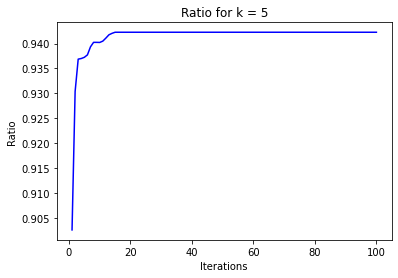

In [ ]:
# For k = 5:
itr = 100   
ratio1 = K_mean_Ratio(k1, data, itr)

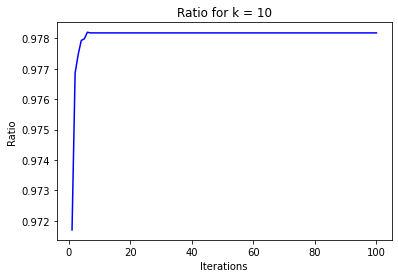

In [ ]:
# For k = 10:
ratio2 = K_mean_Ratio(k2, data, itr)

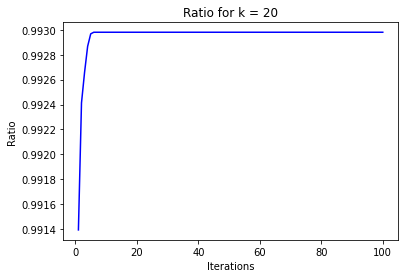

In [ ]:
# For k = 20:
ratio3 = K_mean_Ratio(k3, data, itr)

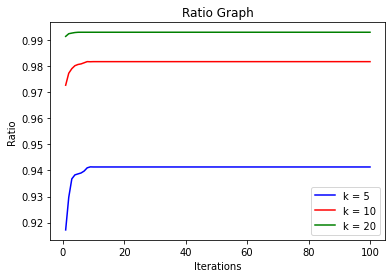

In [ ]:
# Plotting the ratio graph for all three cases:
Itr = list(range(1, itr + 1))
plt.plot(Itr, ratio1, color = 'blue')
plt.plot(Itr, ratio2, color = 'red')
plt.plot(Itr, ratio3, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Ratio')
plt.legend(['k = 5','k = 10','k = 20'])
plt.title('Ratio Graph')
plt.show()

## **Functions:**

In [ ]:
# A function for calculating outer distance:
def Outer_Distance(k, data, centroids, labels):
  out_dist_sum = 0
  for i in range(k):
    out_cluster_sum = 0
    for j in range(0, data.shape[0]):
      if labels[j] == i:
        for c in range(k):
          if c != i:
            out_cluster_sum += Euclidean_Distance(data[j], centroids[c])
    out_dist_sum += out_cluster_sum
  return out_dist_sum

# ------------------------------------------------------------------------------
# A function for calculating Ratio:
def Ratio(outer_distance, inner_distance):
  ratio = outer_distance/(outer_distance + inner_distance)
  return ratio

# ------------------------------------------------------------------------------
# A function for doing the algorithm and find ratio:
def K_mean_Ratio(k, data, itr):
  ratio_list = []
  # Choosing the primary centroids:
  centroids = K_Centroids(k, data)

  for i in range(itr):
    # Clustering:
    labels = Clustering(k, data, centroids)

    # Inner distance:
    inner_distance = Cost_Function(k, data, centroids, labels)

    # Outer distance:
    outer_distance = Outer_Distance(k, data, centroids, labels)

    # Ratio calculation:
    ratio_list.append(Ratio(outer_distance, inner_distance))

    # Updating centroids:
    centroids = Update_Centroids(k, data, centroids, labels)

  # Plotting cost function:
  Itr = list(range(1, itr + 1))
  plt.plot(Itr, ratio_list, color = 'blue')
  plt.xlabel('Iterations')
  plt.ylabel('Ratio')
  plt.title('Ratio for k = {}'.format(k))
  plt.show()
  return ratio_list

### **Mean and Variance of Cost Function and Ratio:**
**Cost Function:**

In [ ]:
# For k = 5:
print("Mean and Variance of the cost function for k = 5:")
print("Mean: {}".format(np.mean(f1)))
print("Variance: {}\n".format(np.var(f1)))

# For k = 10:
print("Mean and Variance of the cost function for k = 10:")
print("Mean: {}".format(np.mean(f2)))
print("Variance: {}\n".format(np.var(f2)))

# For k = 20:
print("Mean and Variance of the cost function for k = 20:")
print("Mean: {}".format(np.mean(f3)))
print("Variance: {}\n".format(np.var(f3)))

Mean and Variance of the cost function for k = 5:
Mean: 55.343927072904094
Variance: 79.18100866079227

Mean and Variance of the cost function for k = 10:
Mean: 37.99369267378161
Variance: 12.32722445298172

Mean and Variance of the cost function for k = 20:
Mean: 23.891712434902786
Variance: 5.737715185414523



**Ratio:**

In [ ]:
# For k = 5:
print("Mean and Variance of the ratio for k = 5:")
print("Mean: {}".format(np.mean(ratio1)))
print("Variance: {}\n".format(np.var(ratio1)))

# For k = 10:
print("Mean and Variance of the ratio for k = 10:")
print("Mean: {}".format(np.mean(ratio2)))
print("Variance: {}\n".format(np.var(ratio2)))

# For k = 20:
print("Mean and Variance of the ratio for k = 20:")
print("Mean: {}".format(np.mean(ratio3)))
print("Variance: {}\n".format(np.var(ratio3)))

Mean and Variance of the ratio for k = 5:
Mean: 0.9414292275598478
Variance: 1.7773399695483444e-05

Mean and Variance of the ratio for k = 10:
Mean: 0.9780916771127116
Variance: 4.3600898004648867e-07

Mean and Variance of the ratio for k = 20:
Mean: 0.9929543736388433
Variance: 2.8909056233338587e-08



**Plotting the mean graphs for cost function and ratio:**

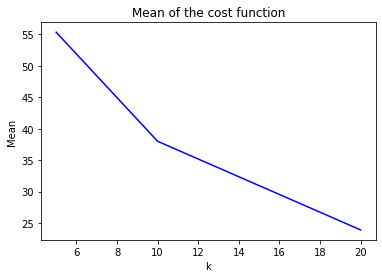

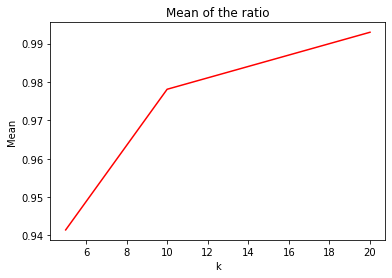

In [ ]:
k_list = [5, 10, 20]
f_mean = [np.mean(f1), np.mean(f2), np.mean(f3)]
ratio_mean = [np.mean(ratio1), np.mean(ratio2), np.mean(ratio3)]
plt.figure()
plt.plot(k_list, f_mean, color = 'blue')
plt.xlabel('k')
plt.ylabel('Mean')
plt.title('Mean of the cost function')
plt.show()

plt.figure()
plt.plot(k_list, ratio_mean, color = 'red')
plt.xlabel('k')
plt.ylabel('Mean')
plt.title('Mean of the ratio')
plt.show()


### **Smart K-means Clustering**

In [ ]:
# For k = 5 and 20 constraints:
constraints_num1 = 20
constrained20_f1, ratio_20_k1 = Constrained_K_mean(k1, data, itr, constraints_num1)

In [ ]:
# For k = 5 and 40 constraints:
constraints_num2 = 40
constrained40_f1, ratio_40_k1 = Constrained_K_mean(k1, data, itr, constraints_num2)

In [ ]:
# For k = 5 and 60 constraints:
constraints_num3 = 60
constrained60_f1, ratio_60_k1 = Constrained_K_mean(k1, data, itr, constraints_num3)

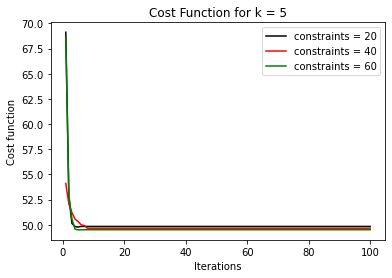

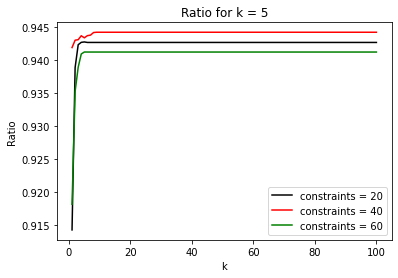

In [ ]:
# Plotting cost function:
plt.figure()
Itr = list(range(1, itr + 1))
plt.plot(Itr, constrained20_f1, color = 'black')
plt.plot(Itr, constrained40_f1, color = 'red')
plt.plot(Itr, constrained60_f1, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.legend(['constraints = 20','constraints = 40','constraints = 60'])
plt.title('Cost Function for k = {}'.format(k1))
plt.show()

# Plotting ratios:
plt.figure()
k_list = [5, 10, 20]
plt.plot(Itr, ratio_20_k1, color = 'black')
plt.plot(Itr, ratio_40_k1, color = 'red')
plt.plot(Itr, ratio_60_k1, color = 'green')
plt.xlabel('k')
plt.ylabel('Ratio')
plt.legend(['constraints = 20','constraints = 40','constraints = 60'])
plt.title('Ratio for k = 5')
plt.show()

In [ ]:
# For k = 10 and 20 constraints:
constrained20_f2, ratio_20_k2 = Constrained_K_mean(k2, data, itr, constraints_num1)

In [ ]:
# For k = 10 and 40 constraints:
constrained40_f2, ratio_40_k2 = Constrained_K_mean(k2, data, itr, constraints_num2)

In [ ]:
# For k = 10 and 60 constraints:
constrained60_f2, ratio_60_k2 = Constrained_K_mean(k2, data, itr, constraints_num3)

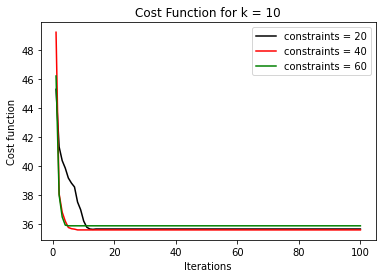

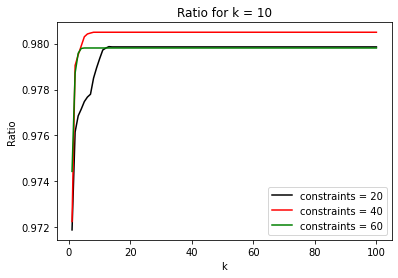

In [ ]:
# Plotting cost function:
plt.figure()
Itr = list(range(1, itr + 1))
plt.plot(Itr, constrained20_f2, color = 'black')
plt.plot(Itr, constrained40_f2, color = 'red')
plt.plot(Itr, constrained60_f2, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.legend(['constraints = 20','constraints = 40','constraints = 60'])
plt.title('Cost Function for k = {}'.format(k2))
plt.show()

# Plotting ratios:
plt.figure()
k_list = [5, 10, 20]
plt.plot(Itr, ratio_20_k2, color = 'black')
plt.plot(Itr, ratio_40_k2, color = 'red')
plt.plot(Itr, ratio_60_k2, color = 'green')
plt.xlabel('k')
plt.ylabel('Ratio')
plt.legend(['constraints = 20','constraints = 40','constraints = 60'])
plt.title('Ratio for k = 10')
plt.show()

In [ ]:
# For k = 20 and 20 constraints:
constrained20_f3, ratio_20_k3 = Constrained_K_mean(k3, data, itr, constraints_num1)

In [ ]:
# For k = 20 and 40 constraints:
constrained40_f3, ratio_40_k3 = Constrained_K_mean(k3, data, itr, constraints_num2)

In [ ]:
# For k = 20 and 60 constraints:
constrained60_f3, ratio_60_k3 = Constrained_K_mean(k3, data, itr, constraints_num3)

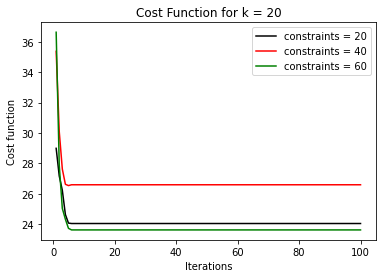

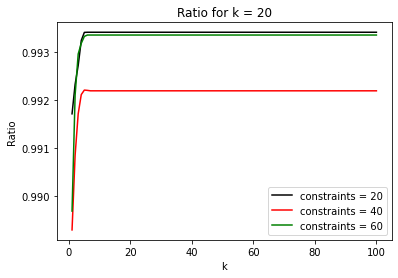

In [ ]:
# Plotting cost function:
plt.figure()
Itr = list(range(1, itr + 1))
plt.plot(Itr, constrained20_f3, color = 'black')
plt.plot(Itr, constrained40_f3, color = 'red')
plt.plot(Itr, constrained60_f3, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.legend(['constraints = 20','constraints = 40','constraints = 60'])
plt.title('Cost Function for k = {}'.format(k3))
plt.show()

# Plotting ratios:
plt.figure()
k_list = [5, 10, 20]
plt.plot(Itr, ratio_20_k3, color = 'black')
plt.plot(Itr, ratio_40_k3, color = 'red')
plt.plot(Itr, ratio_60_k3, color = 'green')
plt.xlabel('k')
plt.ylabel('Ratio')
plt.legend(['constraints = 20','constraints = 40','constraints = 60'])
plt.title('Ratio for k = 20')
plt.show()

### **Functions:**

In [ ]:
# A function for calculating Euclidean Distance:
def Euclidean_Distance(in1, in2):
  distance = sqrt(sum((in1 - in2)**2))
  return distance

# ------------------------------------------------------------------------------
# A function for choosing k random centroids:
def K_Centroids(k, data):
  centroids = []
  for i in range(k):
    indx = random.randint(0 , data.shape[0]-1)
    C = data[indx]
    centroids.append(C)
  return centroids

# ------------------------------------------------------------------------------
# A function for clustering the data:
def Clustering(k, data, centroids):
  labels = []
  for point in data:
    distance = []

    # calculate distance of every point with each of the clusters
    for centroid in centroids:
      dist = Euclidean_Distance(point, centroid)
      distance.append(dist)

    labels.append(np.argmin(distance))
  return labels

# ------------------------------------------------------------------------------
# A function for reading and saving constraints of the text file:
import csv
def read_constraints(constraints_num):
  di = []
  dj = []
  state = []
  with open('Constraint.txt', newline = '') as values:                                                                                          
    value_reader = csv.reader(values, delimiter='\t')
    for value in value_reader:
      di.append(value[0])
      dj.append(value[1])
      state.append(value[2])

  # Eliminating the labels of the text file:
  del di[0]
  del dj[0]
  del state[0]
  # Converting string values to int:
  di = [eval(i) for i in di]
  dj = [eval(i) for i in dj]
  state = [eval(i) for i in state]
  # Choosing random constraints:
  di = random.sample(di, constraints_num)
  dj = random.sample(dj, constraints_num)
  state = random.sample(state, constraints_num)
  return di, dj, state

# ------------------------------------------------------------------------------
# A function for evaluating the constraints and clustering data again:
def Constrained_Clustering(k, data, centroids, labels, di, dj, state):
  for i in range(0, data.shape[0]-1):
    if (i in di):

      # The constraint for being in the same clusters:
      if state == 1:
        if labels[di] != labels[dj]:   # if state = 1 but we have two different labels
          di_dist = Euclidean_Distance(data[di], centroids[labels[di]])
          dj_dist = Euclidean_Distance(data[dj], centroids[labels[dj]])
          if di_dist < dj_dist:   # the right cluster is the cluster in which di is located
            labels[dj] = labels[di]
          elif dj_dist < di_dist:  # the right cluster is the cluster in which dj is located
            labels[di] = labels[dj]

      # The constraint for being in different clusters:
      elif state == -1:
        if labels[di] == labels[dj]:   # if state = -1 but we have two identical labels
          di_dist = Euclidean_Distance(data[di], centroids[labels[di]])
          dj_dist = Euclidean_Distance(data[dj], centroids[labels[dj]])
          if di_dist < dj_dist:   # di is in the right cluster and dj should be labeled again in the closest cluster
            dist = [0 for j in range(k)]
            dist[labels[di]] = 1e5
            for c in range(k):
              if c != labels[di]:
                dist[c] = Euclidean_Distance(data[dj], centroids[c])
            labels[dj] = np.argmin(dist)

          elif dj_dist < di_dist:  # dj is in the right cluster and di should be labeled again in the closest cluster
            dist = [0 for j in range(k)]
            dist[labels[dj]] = 1e5
            for c in range(k):
              if c != labels[dj]:
                dist[c] = Euclidean_Distance(data[di], centroids[c])
            labels[di] = np.argmin(dist)
    
  return labels

# ------------------------------------------------------------------------------
# Cost function:
def Cost_Function(k, data, centroids, labels):
  dist_sum = 0
  for i in range(k):
    cluster_sum = 0
    for j in range(0, data.shape[0]):
      if labels[j] == i:
        cluster_sum += Euclidean_Distance(data[j], centroids[i])
    dist_sum += cluster_sum
  return dist_sum
  
# ------------------------------------------------------------------------------
# A function for updating centroids:
def Update_Centroids(k, data, centroids, labels):
  updated_centroids = []
  for i in range(k):
    cluster_points = []
    for j in range(0, data.shape[0]-1):
      if labels[j] == i:
        cluster_points.append(data[j])

    cluster_avg = np.mean(cluster_points, axis = 0)
    updated_centroids.append(cluster_avg)
  return updated_centroids

# ------------------------------------------------------------------------------
# Overall function for implementing K-mean algorithm:
def Constrained_K_mean(k, data, itr, constraints_num):
  cost_func = []
  ratio_list = []
  di, dj, state = read_constraints(constraints_num)
  # Choosing the primary centroids:
  centroids = K_Centroids(k, data)

  for i in range(itr):
    # Clustering:
    labels = Clustering(k, data, centroids)

    # Evaluating the constraints:
    labels = Constrained_Clustering(k, data, centroids, labels, di, dj, state)

    # Cost Function:
    cost_func.append(Cost_Function(k, data, centroids, labels))

    # Outer distance:
    outer_distance = Outer_Distance(k, data, centroids, labels)

    # Ratio calculation:
    ratio_list.append(Ratio(outer_distance, cost_func[i]))

    # Updating centroids:
    centroids = Update_Centroids(k, data, centroids, labels)
  return cost_func, ratio_list

In [ ]:
k_main = 3
simple_alg_labels = Simple_K_mean(k_main, data, itr)
smart_alg_labels = Smart_K_mean(k_main, data, itr, 60)
Data = load_iris()
true_labels = Data['target']
simple_accuracy = Accuracy(simple_alg_labels)
smart_accuracy = Accuracy(smart_alg_labels)
print("The accuracy for simple k_mean algorithm is: {}".format(simple_accuracy))
print("The accuracy for smart k_mean algorithm is: {}".format(smart_accuracy))

The accuracy for simple k_mean algorithm is: 0.8133333333333334
The accuracy for smart k_mean algorithm is: 0.82


### **Functions:**

In [ ]:
# Simple K_mean:
def Simple_K_mean(k, data, itr):
  # Choosing the primary centroids:
  centroids = K_Centroids(k, data)

  for i in range(itr):
    # Clustering:
    labels = Clustering(k, data, centroids)

    # Updating centroids:
    centroids = Update_Centroids(k, data, centroids, labels)
  return labels

# ------------------------------------------------------------------------------
# Smart K_mean:
def Smart_K_mean(k, data, itr, constraints_num):
  di, dj, state = read_constraints(constraints_num)
  # Choosing the primary centroids:
  centroids = K_Centroids(k, data)

  for i in range(itr):
    # Clustering:
    labels = Clustering(k, data, centroids)

    # Evaluating the constraints:
    labels = Constrained_Clustering(k, data, centroids, labels, di, dj, state)

    # Updating centroids:
    centroids = Update_Centroids(k, data, centroids, labels)
  return labels

# ------------------------------------------------------------------------------
# Accuracy Calculation:
from statistics import mode
def Accuracy(predicted_labels):
  labels = [mode(predicted_labels[0:50]), mode(predicted_labels[50:100]), mode(predicted_labels[100:])]
  count = sum(predicted_labels[0:50] == np.ones(50)*labels[0]) + sum(predicted_labels[50:100] == np.ones(50)*labels[1]) + sum(predicted_labels[100:] == np.ones(50)*labels[2])
  accuracy = count/len(predicted_labels)
  return accuracy